


<div style="text -align:center;">
    <font size="13" color="blue"> Apple Stock Analysis</font>
    </div>

<div style="text -align:center;">
    <font size="3.25" color="red"> 1. Fetch Apple Stock data using yfinance</font>
    </div>

In [1]:
import yfinance as yf

#Fetch apple stock data for last 5 years.
apple_data=yf.download("AAPL",start="2019-01-01", end="2024-01-01")

#Checking first few rows from data
print(apple_data.head())

[*********************100%***********************]  1 of 1 completed

                 Open       High        Low      Close  Adj Close     Volume
Date                                                                        
2019-01-02  38.722500  39.712502  38.557499  39.480000  37.750092  148158800
2019-01-03  35.994999  36.430000  35.500000  35.547501  33.989910  365248800
2019-01-04  36.132500  37.137501  35.950001  37.064999  35.440899  234428400
2019-01-07  37.174999  37.207500  36.474998  36.982498  35.362015  219111200
2019-01-08  37.389999  37.955002  37.130001  37.687500  36.036129  164101200


In [ ]:
#save the data to csv for future use.
#apple_data.to_csv("apple_stock_data.csv")

<div style="text -align:center;">
    <font size="3.25" color="red"> 2.Perform EDA with AutoViz</font>
    </div>


In [2]:
import pandas as pd

from autoviz.AutoViz_Class import AutoViz_Class



# Load  dataset (Apple stock data)
apple_data = pd.read_csv("apple_stock_data.csv")

# Convert 'Date' column to datetime if necessary
if 'Date' in apple_data.columns:
    apple_data['Date'] = pd.to_datetime(apple_data['Date'])

# Ensure the DataFrame is a pure Pandas DataFrame (to avoid any Lux interference)
apple_data = pd.DataFrame(apple_data)

# Initialize AutoViz
AV = AutoViz_Class()

# Run AutoViz on the DataFrame
df_autoviz = AV.AutoViz(filename="", dfte=apple_data)




Imported v0.1.905. Please call AutoViz in this sequence:
    AV = AutoViz_Class()
    %matplotlib inline
    dfte = AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=1, lowess=False,
               chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30, save_plot_dir=None)
Shape of your Data Set loaded: (1258, 7)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    Number of Numeric Columns =  5
    Number of Integer-Categorical Columns =  1
    Number of String-Categorical Columns =  0
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  0
    Number of Numeric-Boolean Columns =  0
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
    Number of 

,Data Type,Missing Values%,Unique Values%,Minimum Value,Maximum Value,DQ Issue
Date,datetime64[ns],0.000000,100,,,Possible date-time colum: transform before modeling step.
Open,float64,0.000000,NA,35.994999,198.020004,No issue
High,float64,0.000000,NA,36.430000,199.619995,Column has a high correlation with ['Open']. Consider dropping one of them.
Low,float64,0.000000,NA,35.500000,197.000000,"Column has a high correlation with ['Open', 'High']. Consider dropping one of them."
Close,float64,0.000000,NA,35.547501,198.110001,"Column has a high correlation with ['Open', 'High', 'Low']. Consider dropping one of them."
Adj Close,float64,0.000000,NA,33.989895,197.361069,"Column has a high correlation with ['Open', 'High', 'Low', 'Close']. Consider dropping one of them."
Volume,int64,0.000000,99,24048300.000000,426510000.000000,Column has 70 outliers greater than upper bound (195401312.50) or lower than lower bound(-8392587.50). Cap them or remove them.


Number of All Scatter Plots = 15
All Plots done
Time to run AutoViz = 5 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


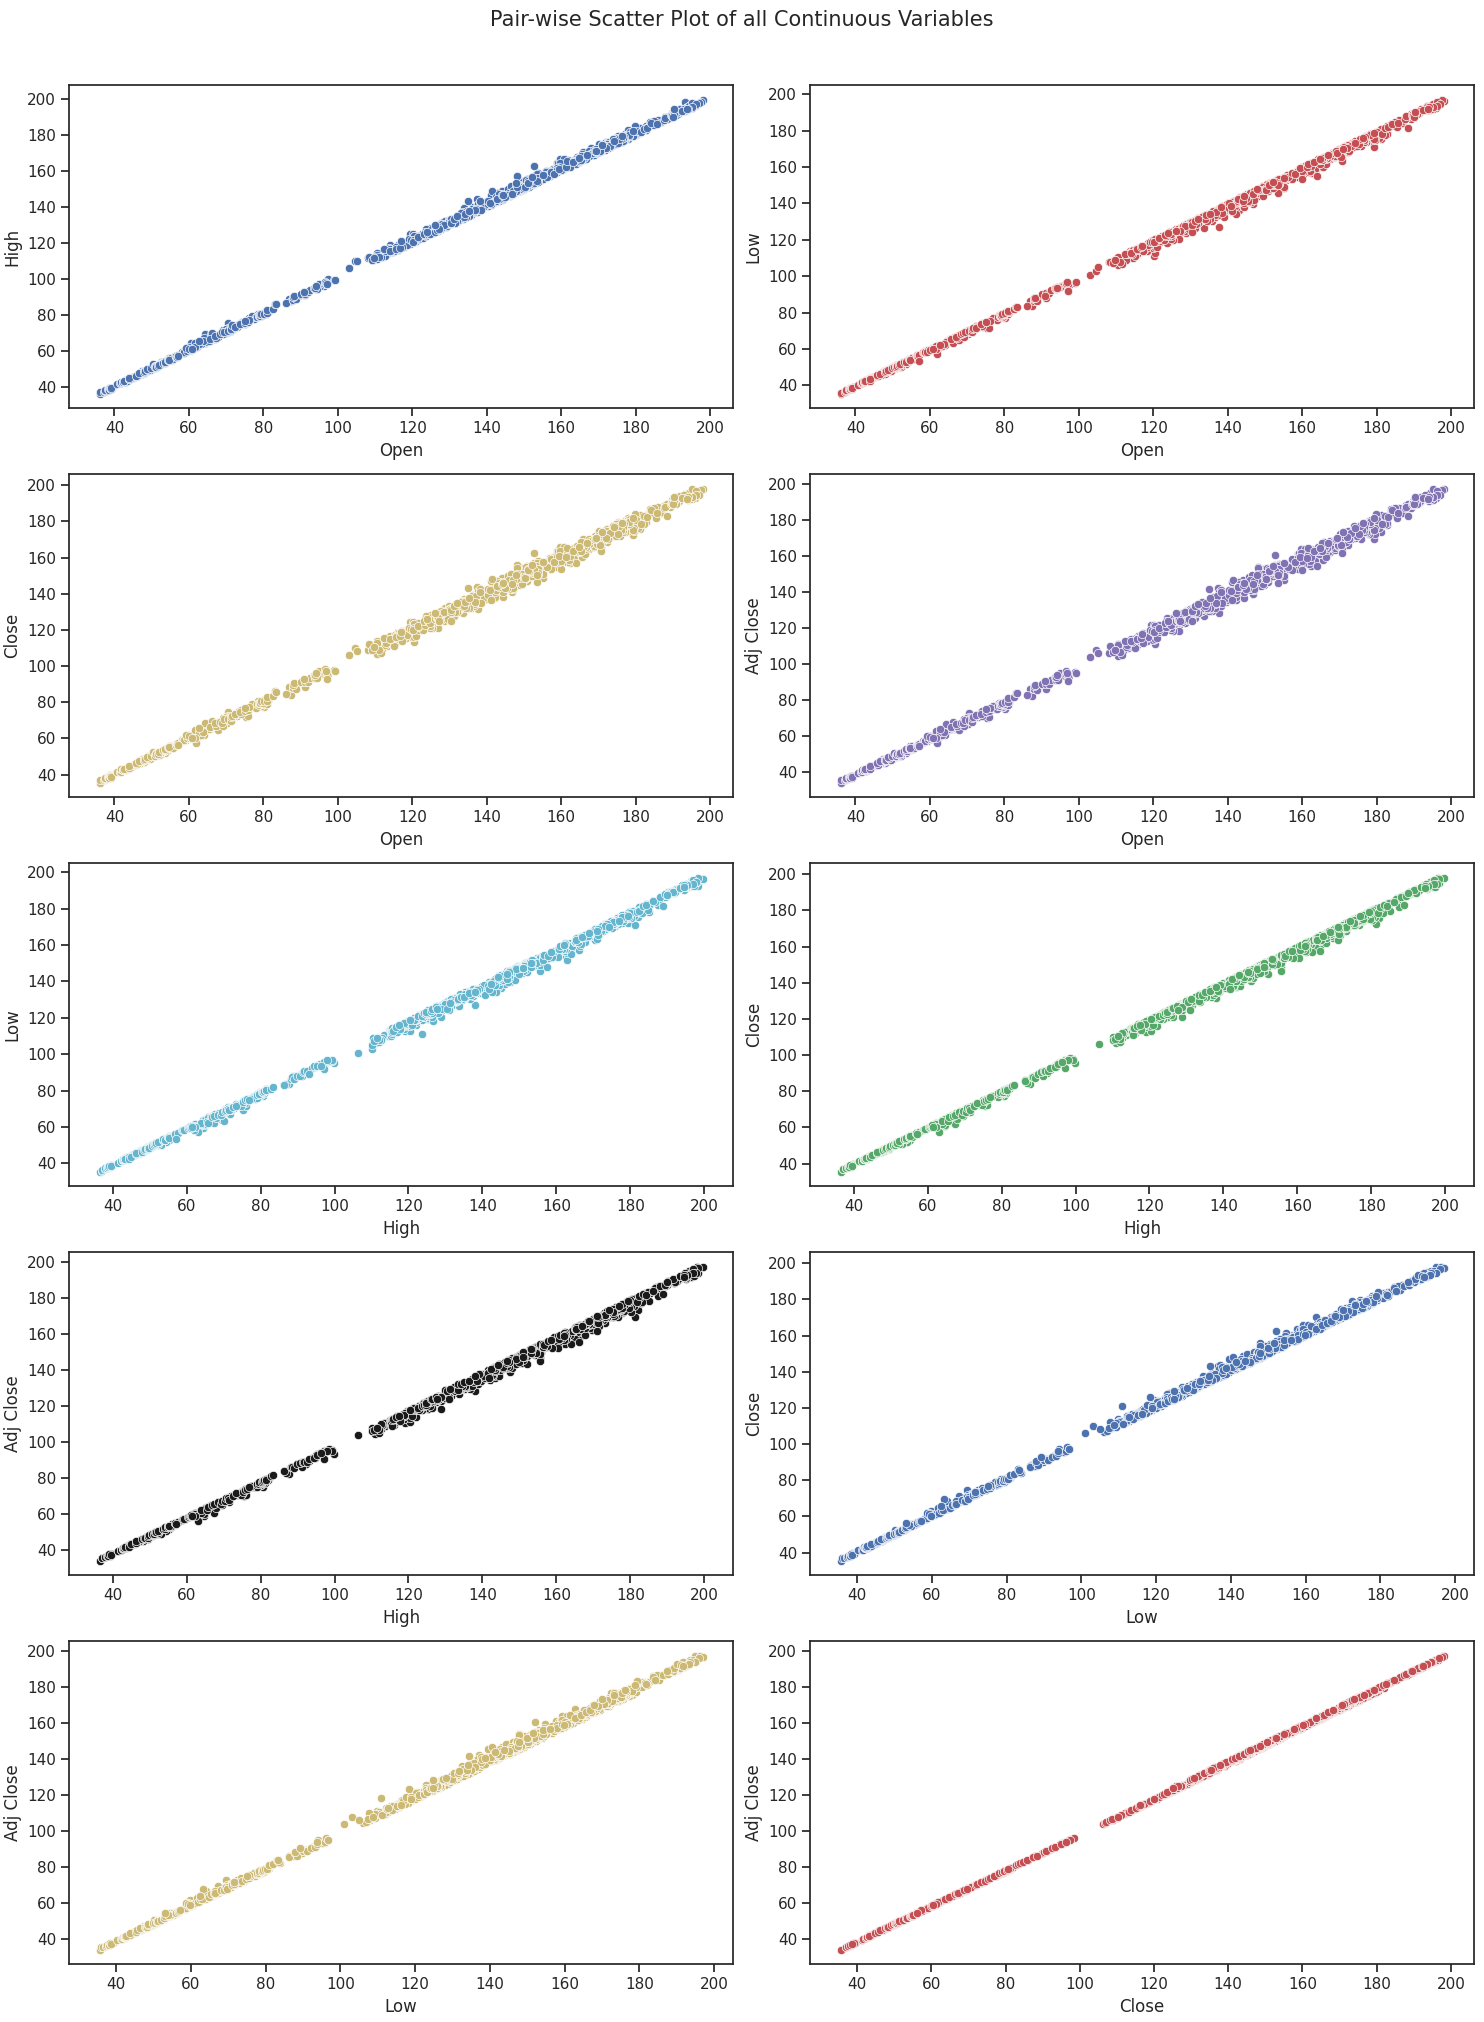

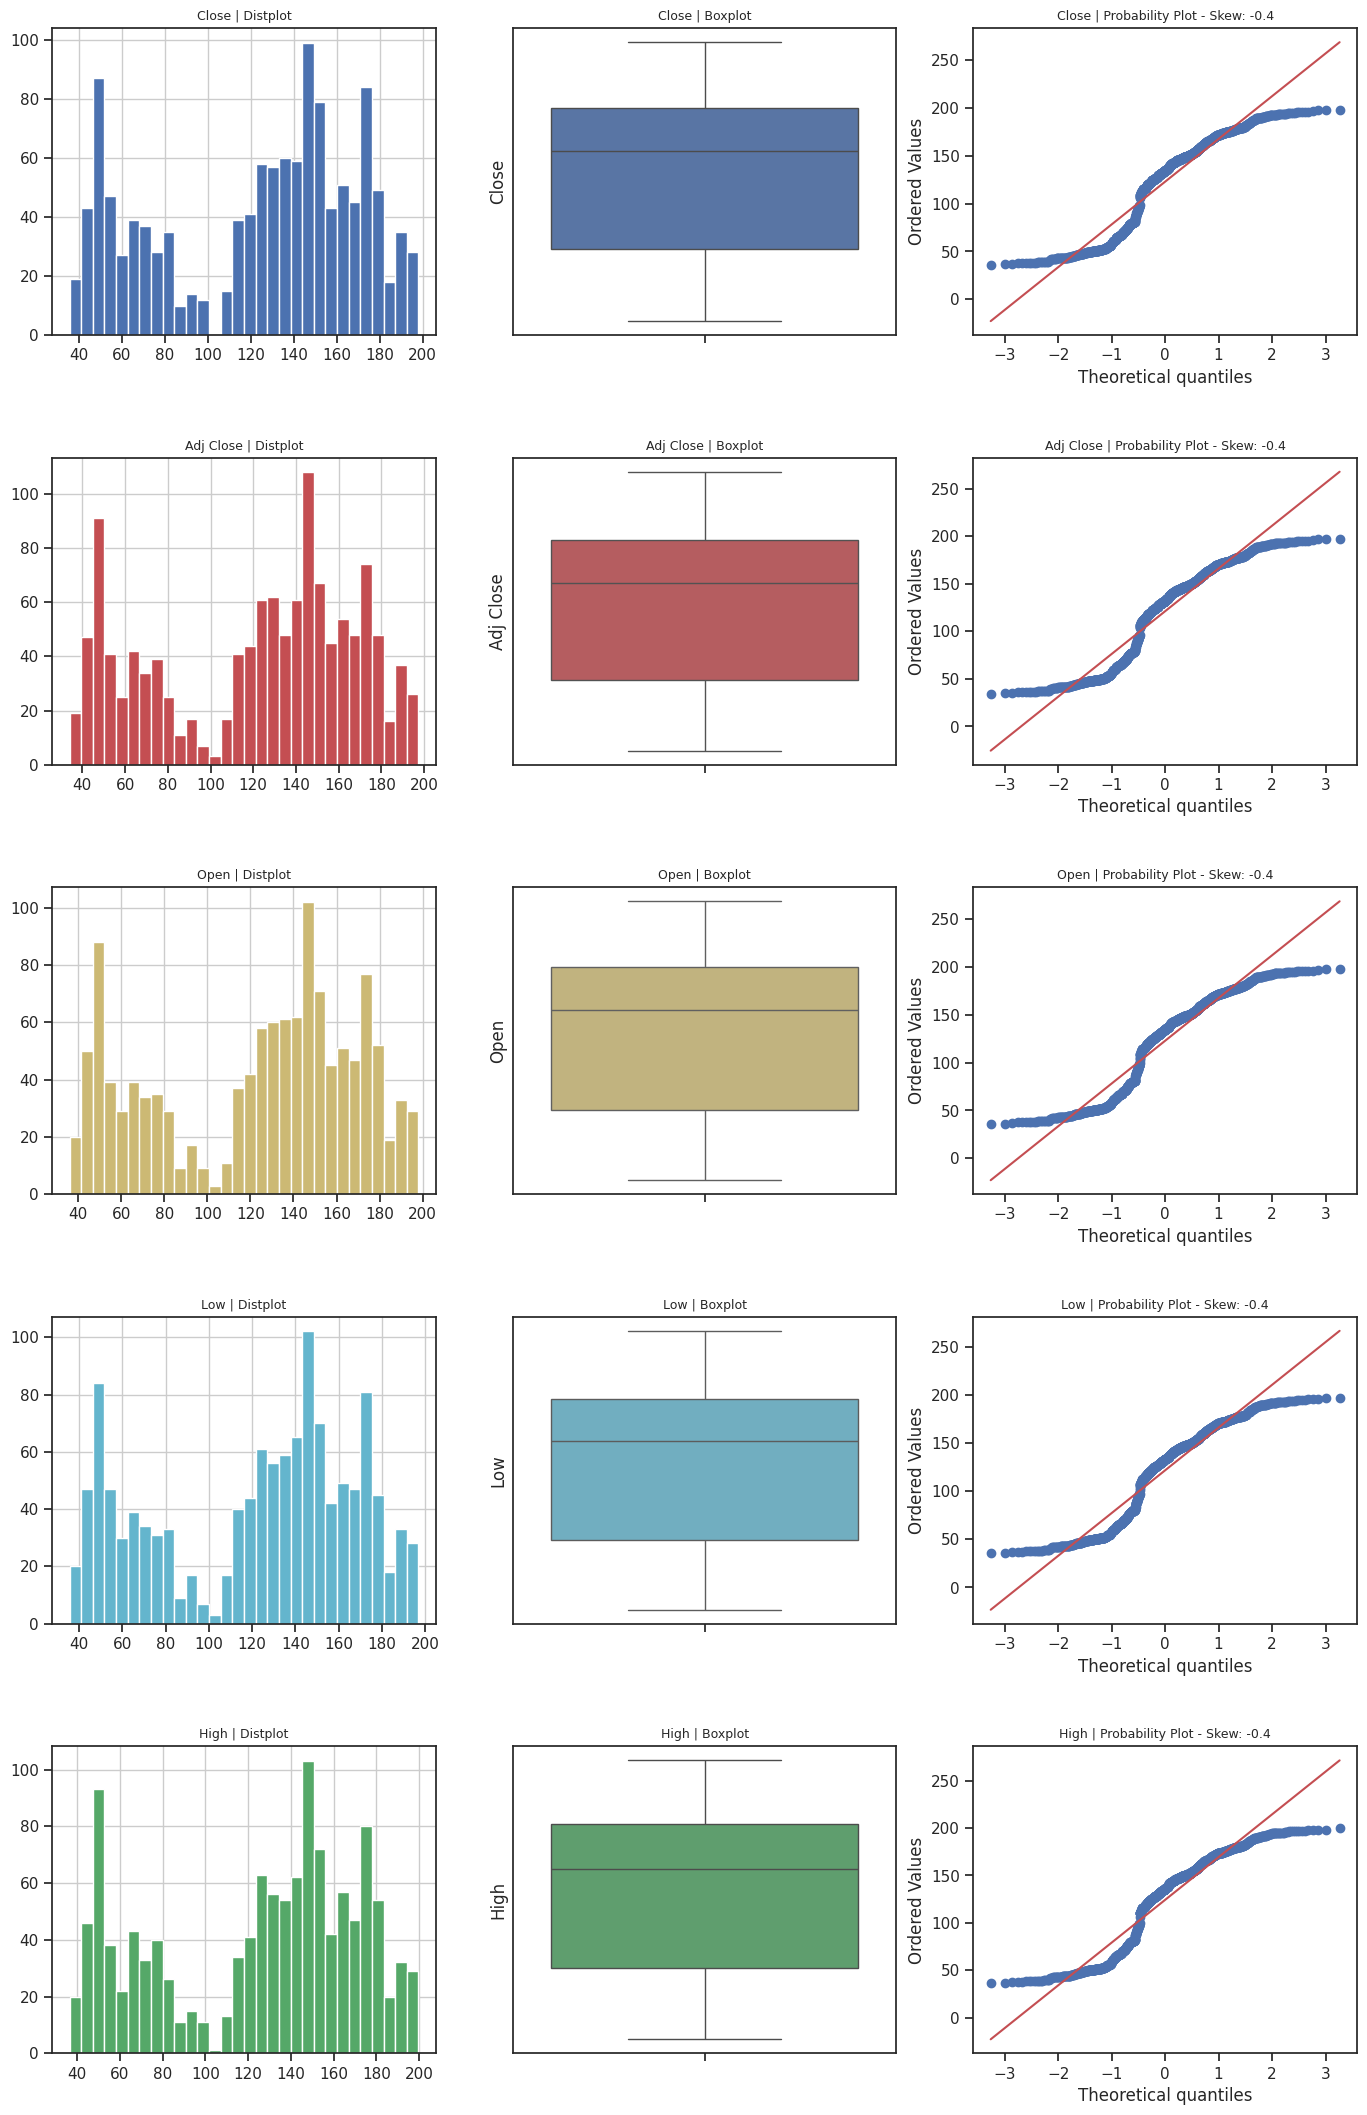

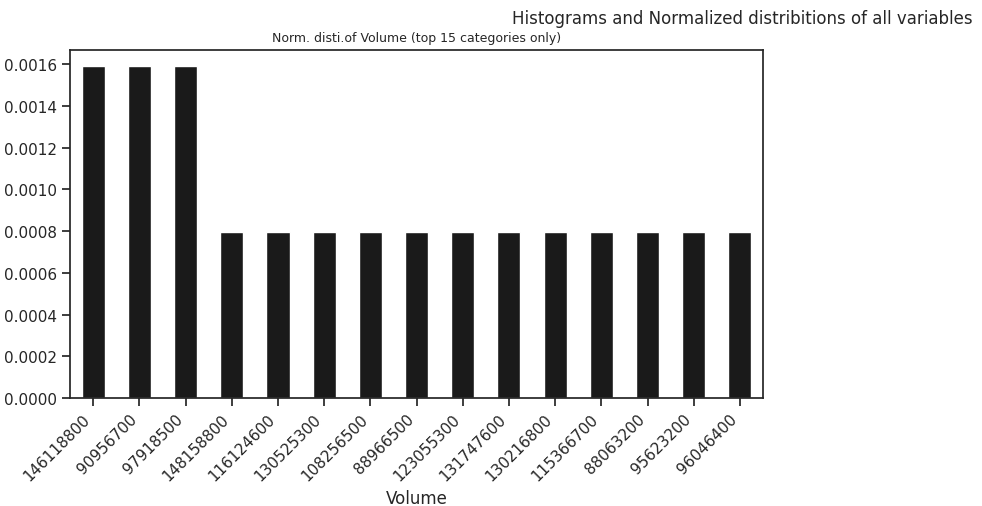

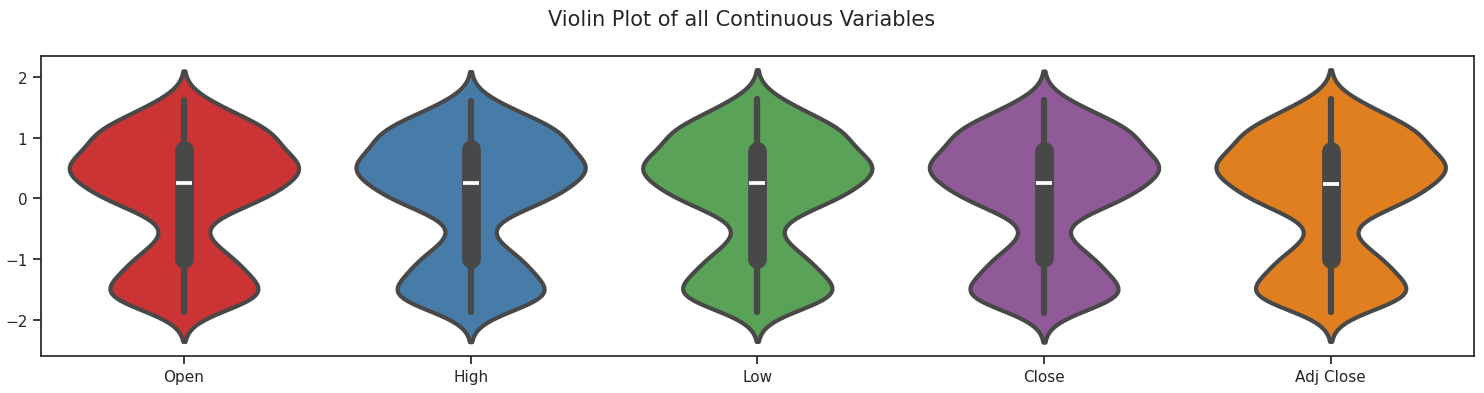

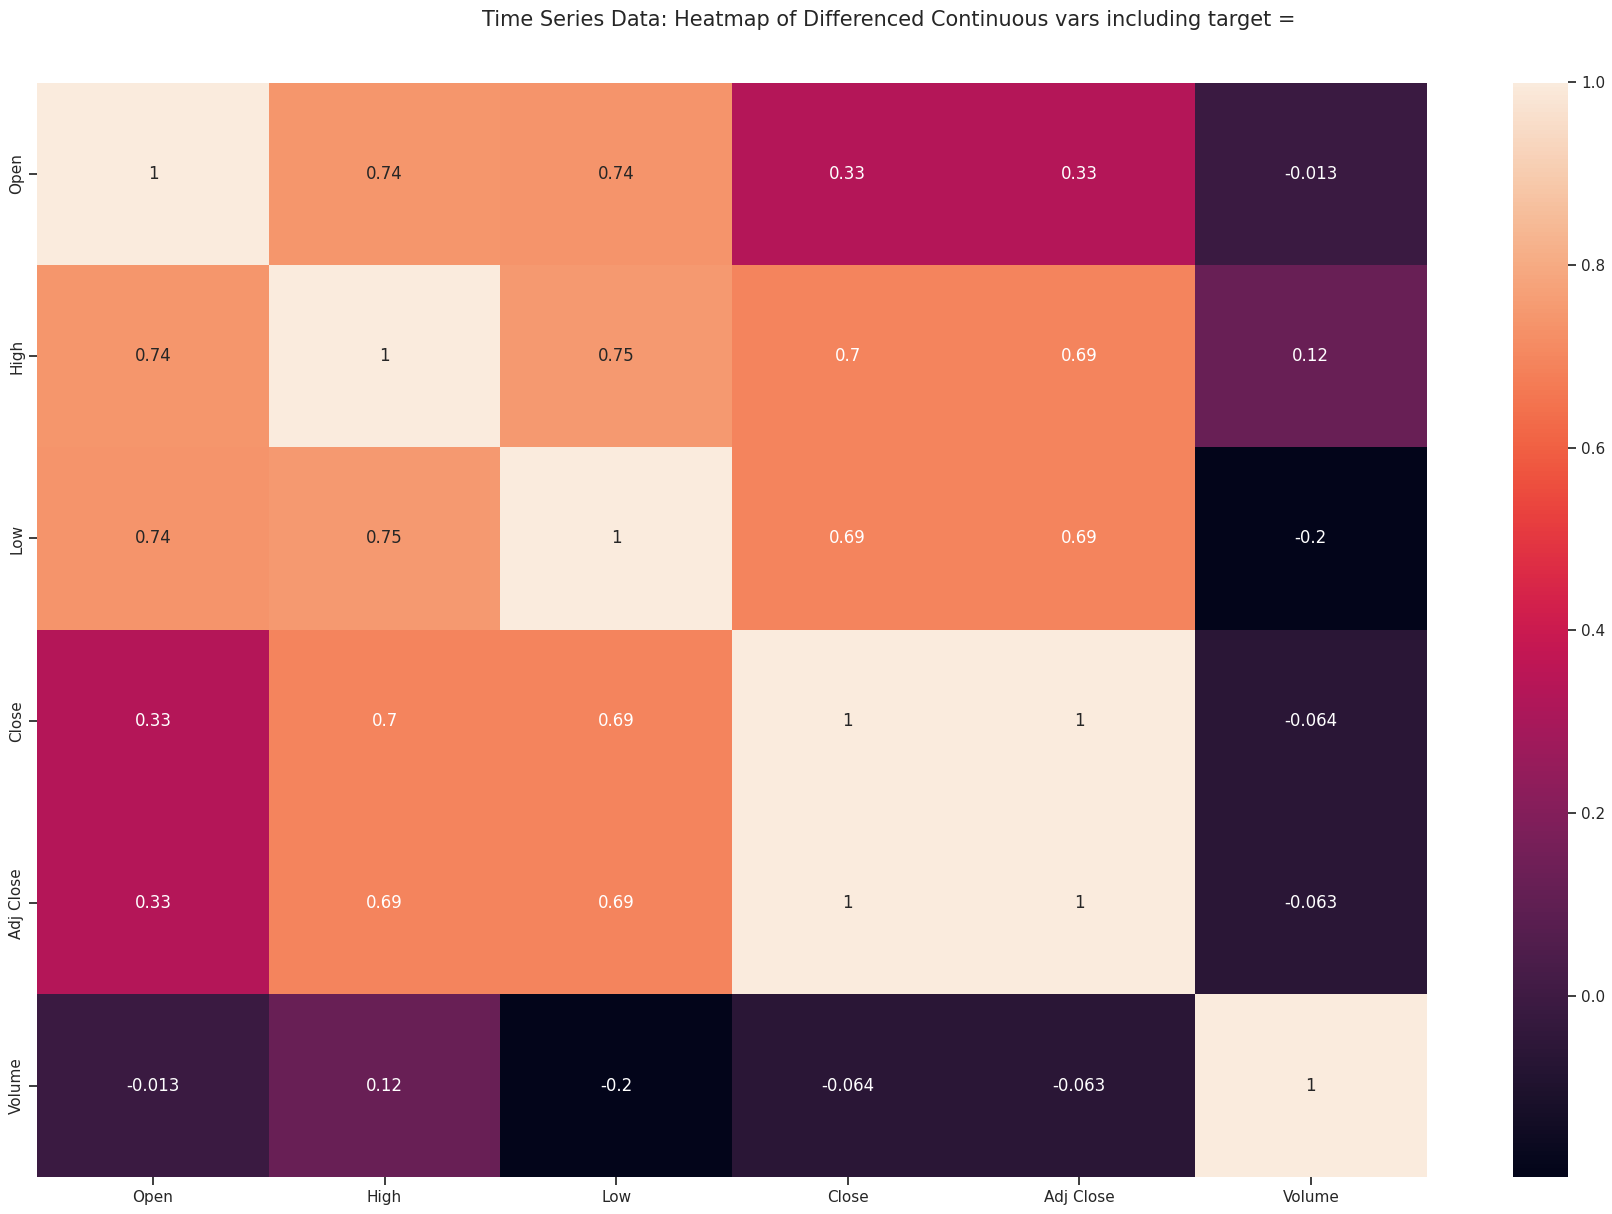

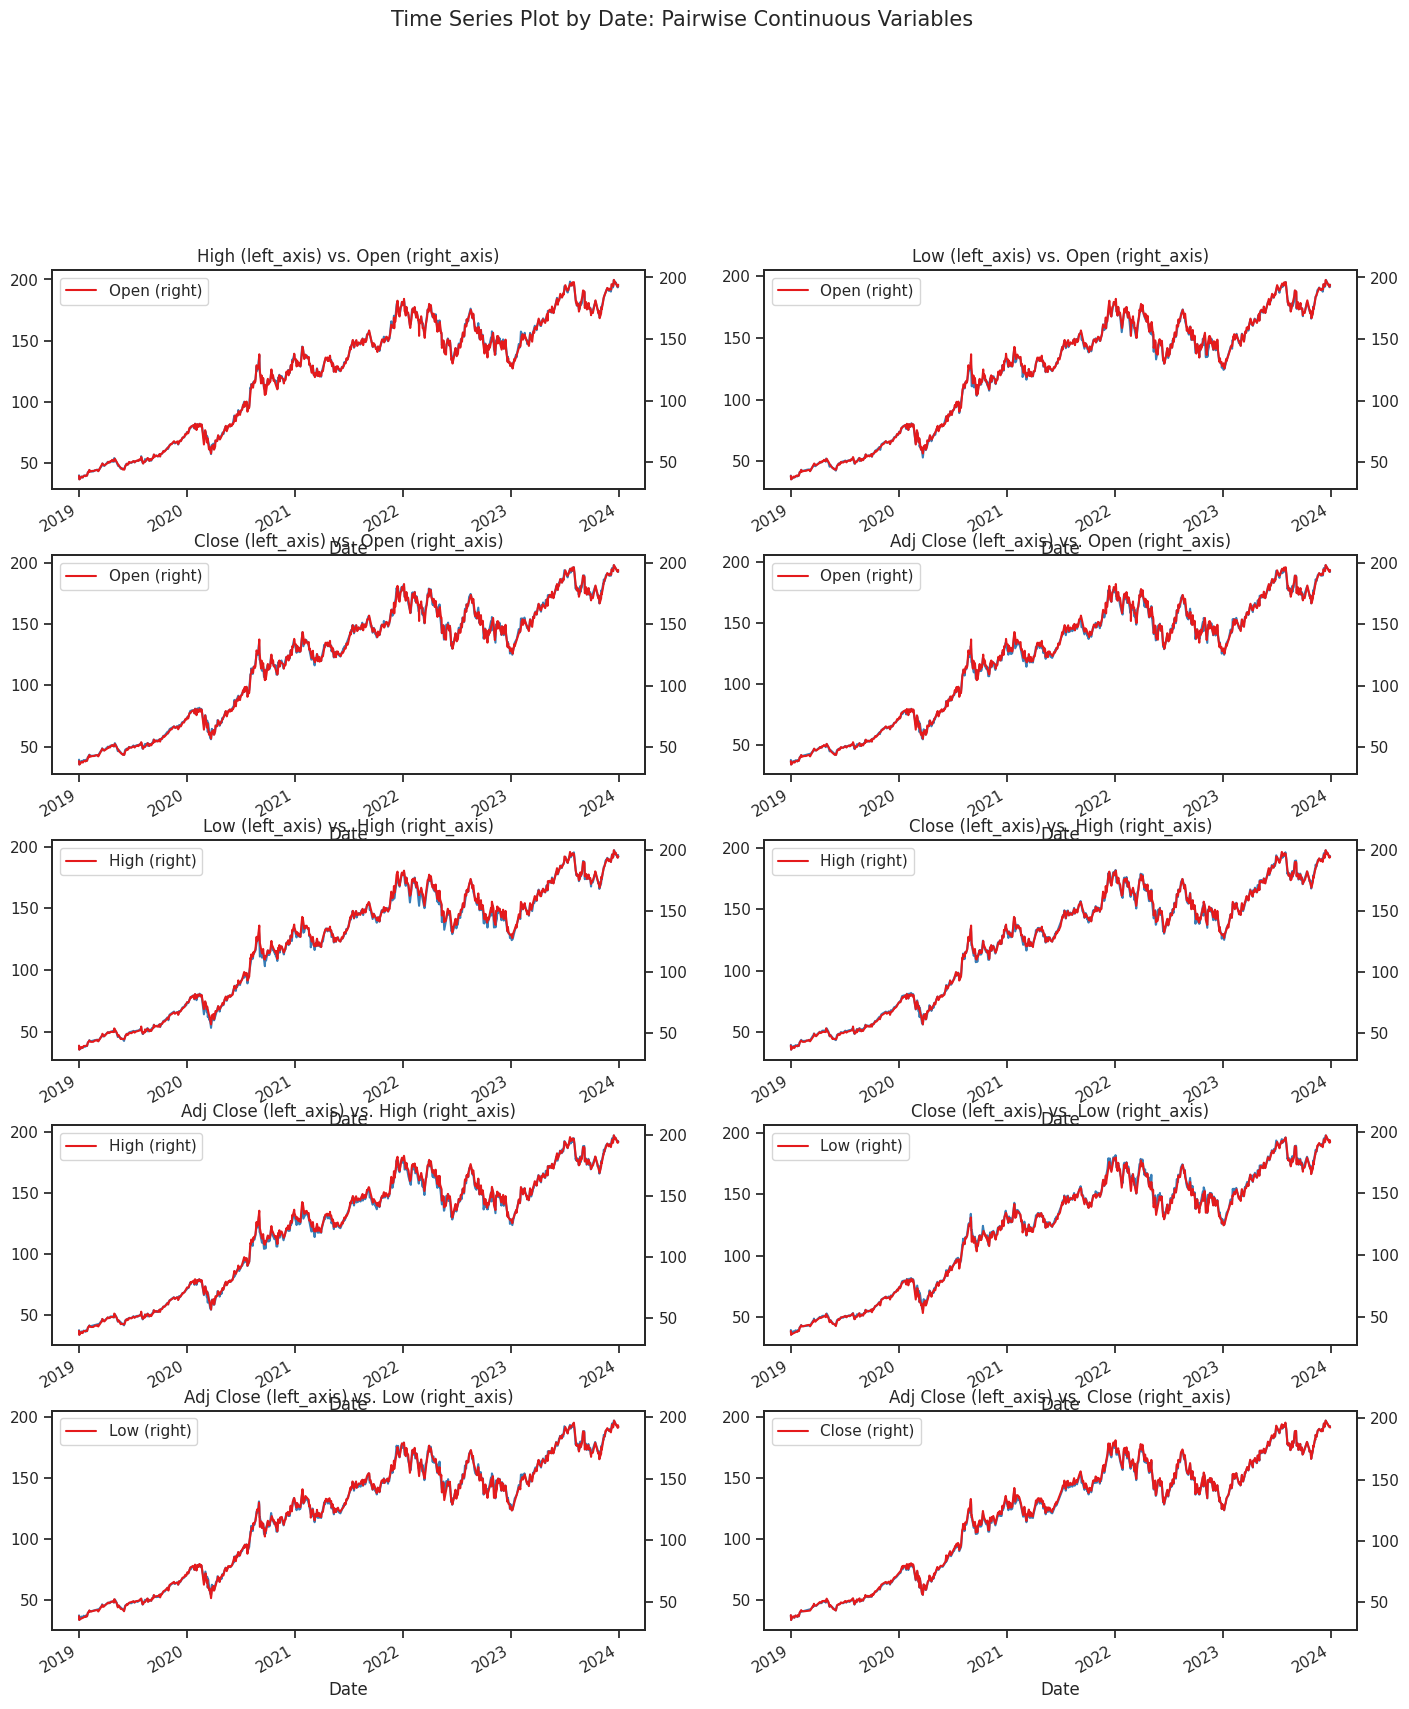

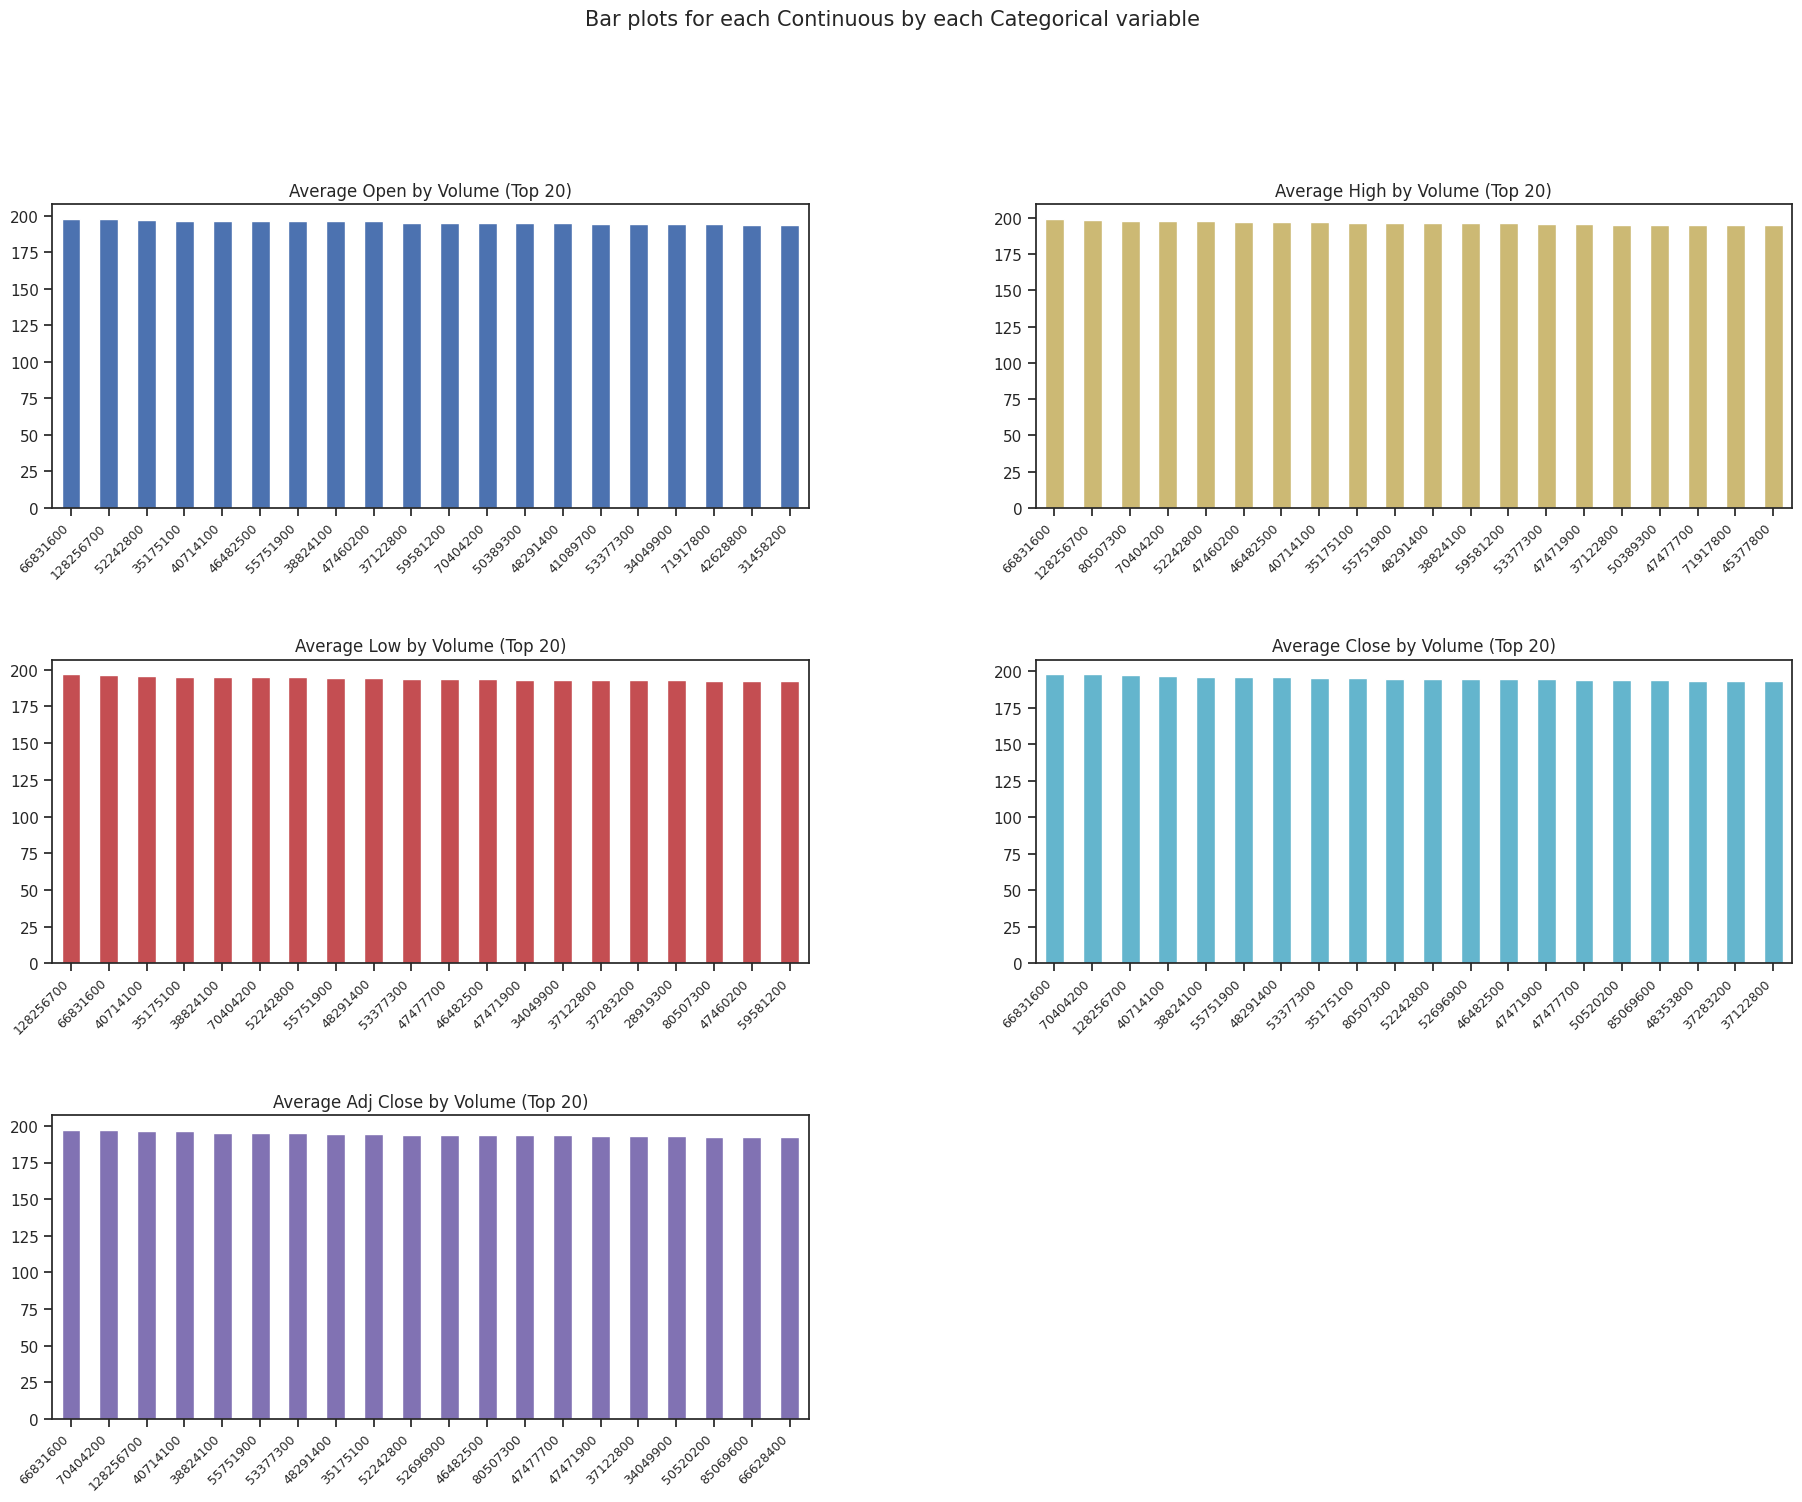

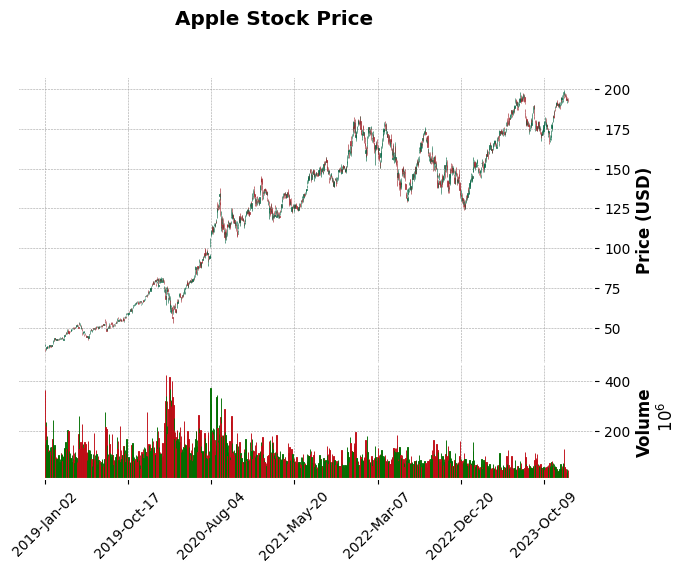

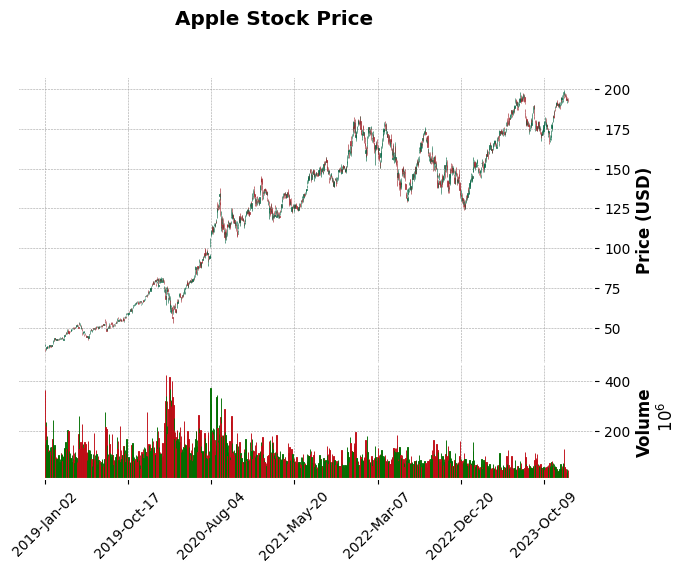

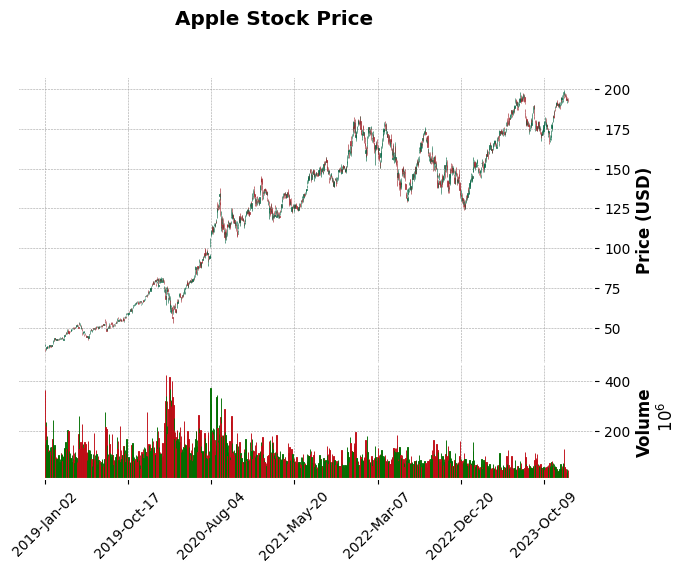

In [5]:
# This line ensures that plots are displayed inline in Jupyter Notebook
%matplotlib inline

import pandas as pd
import mplfinance as mpf

# Load the dataset (Apple stock data)
apple_data = pd.read_csv("apple_stock_data.csv")

# Convert the 'Date' column to datetime
apple_data['Date'] = pd.to_datetime(apple_data['Date'])

# Set 'Date' as the index for the candlestick chart
apple_data.set_index('Date', inplace=True)

# Create the candlestick chart
mpf.plot(apple_data, type='candle', volume=True, style='charles', title='Apple Stock Price',
         ylabel='Price (USD)', ylabel_lower='Volume')

# Explicitly show the plot (optional)
mpf.show()


<div style="text -align:center;">
    <font size="3.25" color="red"> What does the data tells us?
    </font>
    </div>



The Apple stock prices (Open, High, Low, Close, and Adjusted Close) are highly correlated with each other, meaning they generally move in the same direction. 

This is expected in stock market data because prices during the day tend to move together.

Volume has outliers, which could indicate high trading activity on specific days—perhaps due to important news or events that impacted Apple.

Date should be transformed if you plan to build machine learning models to predict future prices, as models may benefit from understanding time-based patterns.


In [ ]:
import pandas as pd
from ydata_profiling import ProfileReport

# Load  dataset (Apple stock data)
apple_data = pd.read_csv("apple_stock_data.csv")

# Generate a profile report
profile = ProfileReport(apple_data, title="Apple Stock Data Profiling Report", explorative=True)

# Save the report to an HTML file
profile.to_file("apple_stock_profile_report.html")

# Display the report in a Jupyter notebook 
profile.to_notebook_iframe()



In [6]:
import pandas as pd

# Load  dataset (Apple stock data)
apple_data = pd.read_csv("apple_stock_data.csv")

# Convert the 'Date' column to datetime
apple_data['Date'] = pd.to_datetime(apple_data['Date'])

# Calculate the percentage change in 'Close' price between consecutive days
apple_data['Pct_Change'] = apple_data['Close'].pct_change() * 100

# View the first few rows to confirm
print(apple_data[['Date', 'Close', 'Pct_Change']].head())


     Date       Close    Pct_Change
0 2019-01-02  39.480000        NaN 
1 2019-01-03  35.547501  -9.960737 
2 2019-01-04  37.064999   4.268930 
3 2019-01-07  36.982498  -0.222583 
4 2019-01-08  37.687500   1.906312 


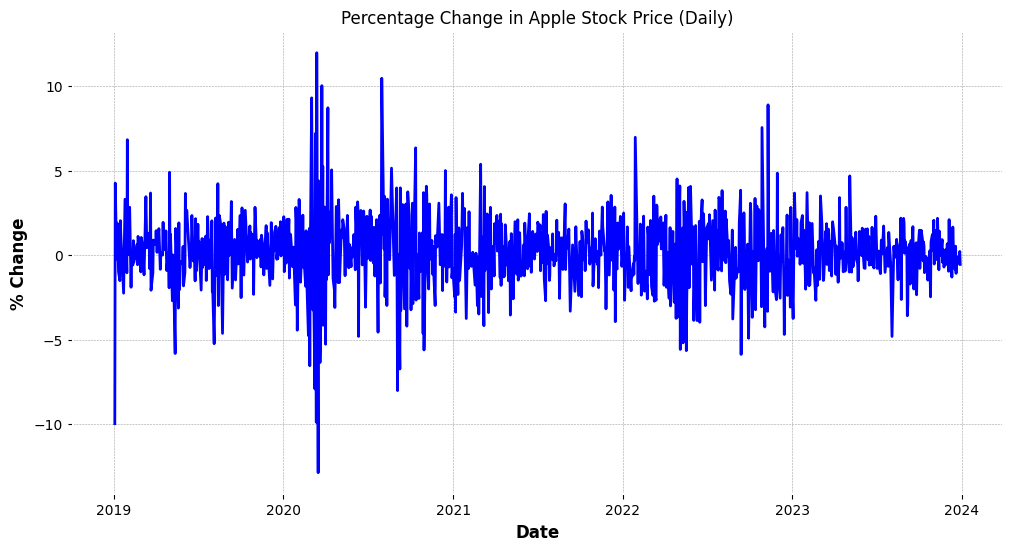

Mode of percentage changes: 0    0.0
Name: Pct_Change, dtype: float64
Maximum (sharpest increase) percentage change: 11.98082665473159%
Minimum (sharpest decrease) percentage change: -12.864695596573805%


In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset (Apple stock data)
apple_data = pd.read_csv("apple_stock_data.csv")

# Convert the 'Date' column to datetime
apple_data['Date'] = pd.to_datetime(apple_data['Date'])

# Calculate the percentage change in 'Close' price between consecutive days
apple_data['Pct_Change'] = apple_data['Close'].pct_change() * 100

# Plot percentage changes to observe sharp movements
plt.figure(figsize=(12, 6))
plt.plot(apple_data['Date'], apple_data['Pct_Change'], label='Daily % Change', color='blue')
plt.title('Percentage Change in Apple Stock Price (Daily)')
plt.xlabel('Date')
plt.ylabel('% Change')
plt.grid(True)
plt.show()

# Calculate the mode for all percentage changes (most frequent value)
mode_pct_change = apple_data['Pct_Change'].mode()

# Identify the maximum and minimum percentage change (sharpest changes)
max_pct_change = apple_data['Pct_Change'].max()
min_pct_change = apple_data['Pct_Change'].min()

# Display results
print(f"Mode of percentage changes: {mode_pct_change}")
print(f"Maximum (sharpest increase) percentage change: {max_pct_change}%")
print(f"Minimum (sharpest decrease) percentage change: {min_pct_change}%")


In [8]:
import pandas as pd

# Load your dataset (Apple stock data)
apple_data = pd.read_csv("apple_stock_data.csv")

# Convert the 'Date' column to datetime
apple_data['Date'] = pd.to_datetime(apple_data['Date'])

# Calculate the percentage change in 'Close' price between consecutive days
apple_data['Pct_Change'] = apple_data['Close'].pct_change() * 100

# Set the thresholds for sharp increase and sharp decrease
sharp_increase_threshold = 5  # 5% increase
sharp_decrease_threshold = -5  # -5% decrease

# Identify dates with sharp increases (greater than 5%)
sharp_increase = apple_data[apple_data['Pct_Change'] > sharp_increase_threshold]

# Identify dates with sharp decreases (less than -5%)
sharp_decrease = apple_data[apple_data['Pct_Change'] < sharp_decrease_threshold]

# Display the dates and stock prices for sharp increases
print("Dates with sharp increases (greater than 5%):")
print(sharp_increase[['Date', 'Close', 'Pct_Change']])

# Display the dates and stock prices for sharp decreases
print("\nDates with sharp decreases (less than -5%):")
print(sharp_decrease[['Date', 'Close', 'Pct_Change']])


Dates with sharp increases (greater than 5%):
       Date        Close    Pct_Change
19  2019-01-30   41.312500    6.833468
292 2020-03-02   74.702499    9.310072
298 2020-03-10   71.334999    7.202157
301 2020-03-13   69.492500   11.980827
308 2020-03-24   61.720001   10.032540
310 2020-03-26   64.610001    5.262300
317 2020-04-06   65.617500    8.723747
322 2020-04-14   71.762497    5.050316
398 2020-07-31  106.260002   10.468863
413 2020-08-21  124.370003    5.153246
448 2020-10-12  124.400002    6.352056
493 2020-12-15  127.879997    5.009031
543 2021-03-01  127.790001    5.385122
775 2022-01-28  170.330002    6.977767
964 2022-10-28  155.740005    7.555250
973 2022-11-10  146.869995    8.897457

Dates with sharp decreases (less than -5%):
       Date        Close    Pct_Change
1   2019-01-03   35.547501   -9.960737
90  2019-05-13   46.430000   -5.811944
148 2019-08-05   48.334999   -5.234785
290 2020-02-27   68.379997   -6.536821
297 2020-03-09   66.542503   -7.909209
300 2020-03-

[*********************100%***********************]  1 of 1 completed


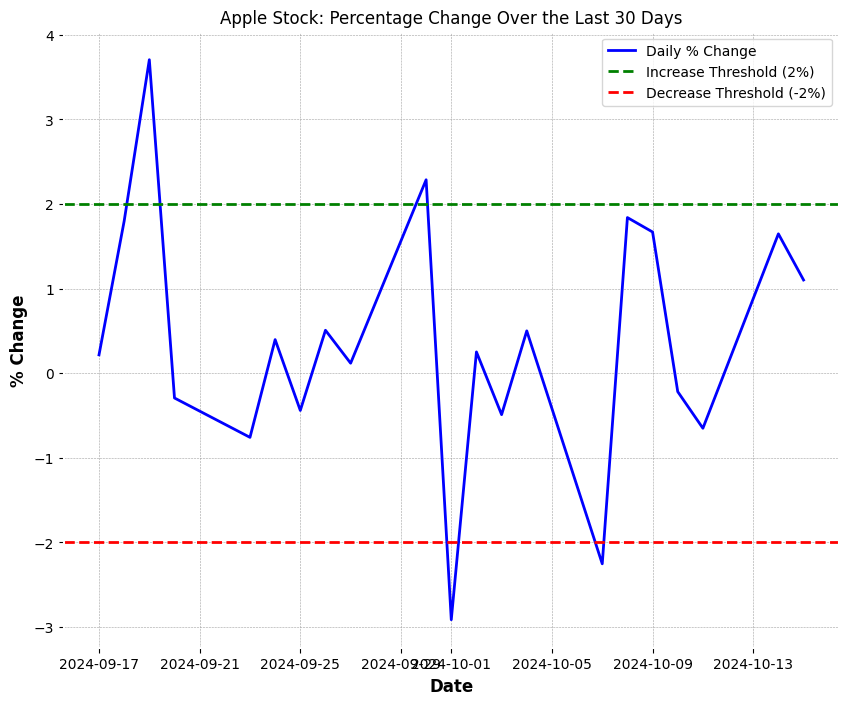


Date: 2024-09-19, Percentage Change: 3.71%
Title: Oprah buys back her Apple TV+ documentary to lock it away
URL: https://consent.yahoo.com/v2/collectConsent?sessionId=1_cc-session_dcc5640b-d89e-4a85-91ec-8715a629adab

Title: Looking for AirPods Alternatives? You Can Save 20% on a Pair of Noise-Canceling Beats Fit Pro
URL: https://gizmodo.com/looking-for-airpods-alternatives-you-can-save-20-on-a-pair-of-noise-canceling-beats-fit-pro-2000501067

Title: The Morning After: Our verdict on the iPhone 16 Pro
URL: https://consent.yahoo.com/v2/collectConsent?sessionId=1_cc-session_96dd0644-68cd-4f1b-8bb6-3217d59c67c3

Title: Apple Vision Pro's New OS Subtly Expands the Headset's Potential
URL: https://www.cnet.com/tech/computing/apple-vision-pros-new-os-subtly-raises-the-bar-on-the-headsets-potential/

Title: Apple Reportedly Suspends MacBook Air Supplier Due to 'Quality Issues'
URL: https://www.macrumors.com/2024/09/19/macbook-air-supplier-quality-issues-report/

Title: Apple Gets EU Warning 

In [13]:
import yfinance as yf
import pandas as pd
from newsapi import NewsApiClient
import matplotlib.pyplot as plt

# Initialize the News API client (use  API key from https://newsapi.org/)
newsapi = NewsApiClient(api_key='be43932358024211ad050e5053e4b34e')

# Fetch Apple stock data for the last 30 days
apple_data = yf.download("AAPL", period="1mo")

# Calculate the percentage change in 'Close' price between consecutive days
apple_data['Pct_Change'] = apple_data['Close'].pct_change() * 100

# Define threshold for significant price movements 
increase_threshold = 2  # 2% increase
decrease_threshold = -2  # 2% decrease

# Identify dates with significant increases and decreases
significant_changes = apple_data[(apple_data['Pct_Change'] >= increase_threshold) | 
                                 (apple_data['Pct_Change'] <= decrease_threshold)]

# Plot percentage changes
plt.figure(figsize=(10, 8))
plt.plot(apple_data.index, apple_data['Pct_Change'], label='Daily % Change', color='blue')
plt.axhline(y=increase_threshold, color='green', linestyle='--', label='Increase Threshold (2%)')
plt.axhline(y=decrease_threshold, color='red', linestyle='--', label='Decrease Threshold (-2%)')
plt.title('Apple Stock: Percentage Change Over the Last 30 Days')
plt.xlabel('Date')
plt.ylabel('% Change')
plt.legend()
plt.grid(True)
plt.show()

# Function to fetch news for a given date
def fetch_news_for_date(date):
    # Convert date to string in YYYY-MM-DD format
    date_str = date.strftime('%Y-%m-%d')
    
    # Fetch news articles related to Apple on the given date
    articles = newsapi.get_everything(q='Apple',
                                      from_param=date_str,
                                      to=date_str,
                                      language='en',
                                      sort_by='relevancy')
    return articles['articles']

# Loop through each significant date and fetch related news
for index, row in significant_changes.iterrows():
    print(f"\nDate: {index.date()}, Percentage Change: {row['Pct_Change']:.2f}%")
    
    # Fetch news articles for the date
    news_articles = fetch_news_for_date(index)
    
    # Display the news headlines and URLs
    if news_articles:
        for article in news_articles:
            print(f"Title: {article['title']}")
            print(f"URL: {article['url']}\n")
    else:
        print("No news articles found for this date.")


In [16]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Load dataset
apple_data = pd.read_csv("apple_stock_data.csv")

# Convert the 'Date' column to datetime and set it as the index
apple_data['Date'] = pd.to_datetime(apple_data['Date'])
apple_data.set_index('Date', inplace=True)

# Feature engineering: We'll use 'Open', 'High', 'Low', 'Volume' to predict 'Close'
features = apple_data[['Open', 'High', 'Low', 'Volume']]
target = apple_data['Close']

# Normalize/Scale the data
scaler = MinMaxScaler()
features_scaled = scaler.fit_transform(features)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_scaled, target, test_size=0.2, shuffle=False)

# Reshape for LSTM (LSTM expects 3D input: samples, time steps, features)
X_train_lstm = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test_lstm = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))


Data loaded successfully.
Sequences created successfully.
Training samples: 958
Testing samples: 240
Epoch 1/20
24/24 [==============================] - 7s 92ms/step - loss: 0.0546 - val_loss: 0.0096
Epoch 2/20
24/24 [==============================] - 1s 53ms/step - loss: 0.0090 - val_loss: 0.0033
Epoch 3/20
24/24 [==============================] - 1s 53ms/step - loss: 0.0038 - val_loss: 0.0025
Epoch 4/20
24/24 [==============================] - 1s 57ms/step - loss: 0.0040 - val_loss: 0.0040
Epoch 5/20
24/24 [==============================] - 1s 57ms/step - loss: 0.0033 - val_loss: 0.0022
Epoch 6/20
24/24 [==============================] - 1s 54ms/step - loss: 0.0032 - val_loss: 0.0025
Epoch 7/20
24/24 [==============================] - 1s 53ms/step - loss: 0.0031 - val_loss: 0.0025
Epoch 8/20
24/24 [==============================] - 1s 55ms/step - loss: 0.0025 - val_loss: 0.0032
Epoch 9/20
24/24 [==============================] - 1s 54ms/step - loss: 0.0027 - val_loss: 0.0019
Epoch 10

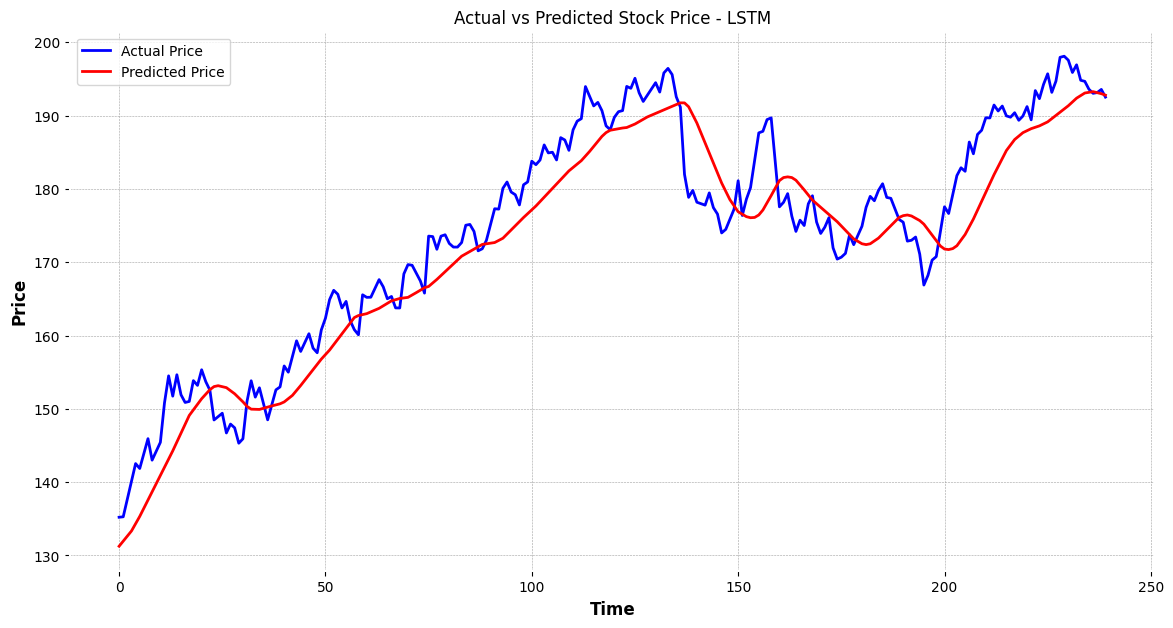

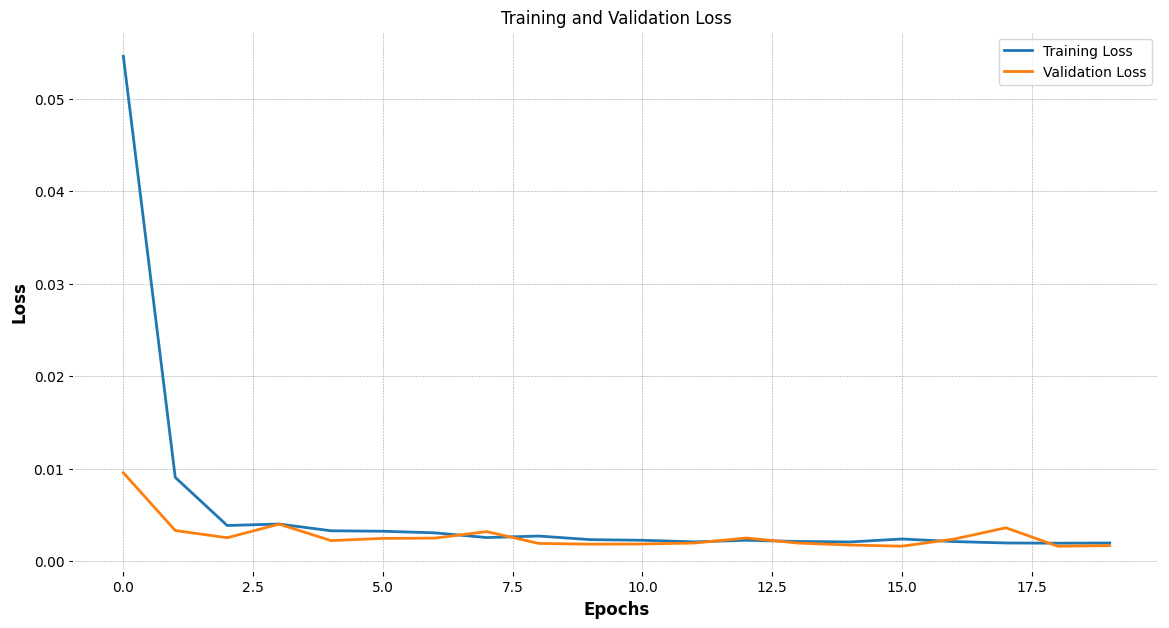

In [21]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from sklearn.model_selection import train_test_split

# Step 1: Load Data
data_path = 'C:/Users/HP/apple_stock_data.csv'  # Update this path with your data file path
df = pd.read_csv(data_path)
print("Data loaded successfully.")

# Step 2: Preprocessing Data
# Using the 'Close' column for stock price prediction
data = df[['Close']].values

# Step 3: Scaling Data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Step 4: Create Sequences
def create_sequences(data, look_back=60):
    X, y = [], []
    for i in range(len(data) - look_back):
        X.append(data[i:i + look_back])
        y.append(data[i + look_back])
    return np.array(X), np.array(y)

look_back = 60
X, y = create_sequences(scaled_data, look_back)
print("Sequences created successfully.")

# Step 5: Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
print(f'Training samples: {X_train.shape[0]}')
print(f'Testing samples: {X_test.shape[0]}')

# Step 6: Build LSTM Model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=25))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Step 7: Train LSTM Model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)
print("LSTM model trained.")

# Step 8: Make Predictions
y_pred_lstm = model.predict(X_test)
y_pred_lstm = scaler.inverse_transform(y_pred_lstm)
y_test_lstm = scaler.inverse_transform(y_test.reshape(-1, 1))

# Step 9: Evaluate the Model
mse_lstm = mean_squared_error(y_test_lstm, y_pred_lstm)
mae_lstm = mean_absolute_error(y_test_lstm, y_pred_lstm)
rmse_lstm = np.sqrt(mse_lstm)
r2_lstm = r2_score(y_test_lstm, y_pred_lstm)

print(f"LSTM Performance:")
print(f"Mean Squared Error (MSE): {mse_lstm}")
print(f"Mean Absolute Error (MAE): {mae_lstm}")
print(f"Root Mean Squared Error (RMSE): {rmse_lstm}")
print(f"R-squared (R²): {r2_lstm}")

# Step 10: Plot Predictions
def plot_predictions(y_true, y_pred, model_name="Model"):
    plt.figure(figsize=(14, 7))
    plt.plot(y_true, label='Actual Price', color='blue')
    plt.plot(y_pred, label='Predicted Price', color='red')
    plt.title(f'Actual vs Predicted Stock Price - {model_name}')
    plt.xlabel('Time')
    plt.ylabel('Price')
    plt.legend()
    plt.show()

# Plot LSTM predictions
plot_predictions(y_test_lstm, y_pred_lstm, model_name="LSTM")

# Optional: Plot training history for LSTM
plt.figure(figsize=(14, 7))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam, RMSprop
from sklearn.preprocessing import MinMaxScaler
import numpy as np

def create_lstm_model(units, dropout_rate, optimizer):
    model = Sequential()
    model.add(LSTM(units=units, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
    model.add(Dropout(dropout_rate))
    model.add(LSTM(units=units, return_sequences=False))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1))
    
    # Compile the model
    model.compile(optimizer=optimizer, loss='mean_squared_error')
    
    return model

# Experiment with different hyperparameters
lstm_units = [64, 128]        # Try different numbers of LSTM units
dropout_rates = [0.2, 0.3]    # Try different dropout rates
optimizers = ['adam', 'rmsprop']  # Test Adam and RMSprop optimizers
batch_sizes = [64, 128]       # Try different batch sizes
epochs = 50                   # Start with 50 epochs

best_model = None
best_mse = float("inf")

# Iterate through each combination of hyperparameters
for units in lstm_units:
    for dropout_rate in dropout_rates:
        for optimizer in optimizers:
            for batch_size in batch_sizes:
                print(f"Training with units={units}, dropout_rate={dropout_rate}, optimizer={optimizer}, batch_size={batch_size}")
                
                # Create the model with the current hyperparameters
                model = create_lstm_model(units, dropout_rate, optimizer)
                
                # Train the model
                history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, y_test), verbose=1)
                
                # Evaluate the model
                test_mse = model.evaluate(X_test, y_test)
                
                # Track the best performing model
                if test_mse < best_mse:
                    best_mse = test_mse
                    best_model = model
                    print(f"New best model found: MSE = {best_mse}")

print(f"Best model MSE: {best_mse}")


Training with units=64, dropout_rate=0.2, optimizer=adam, batch_size=64
Epoch 1/50
15/15 [==============================] - 7s 159ms/step - loss: 0.0801 - val_loss: 0.0373
Epoch 2/50
15/15 [==============================] - 1s 99ms/step - loss: 0.0113 - val_loss: 0.0010
Epoch 3/50
15/15 [==============================] - 1s 100ms/step - loss: 0.0051 - val_loss: 0.0045
Epoch 4/50
15/15 [==============================] - 1s 95ms/step - loss: 0.0038 - val_loss: 0.0019
Epoch 5/50
15/15 [==============================] - 1s 93ms/step - loss: 0.0038 - val_loss: 0.0014
Epoch 6/50
15/15 [==============================] - 2s 108ms/step - loss: 0.0035 - val_loss: 0.0015
Epoch 7/50
15/15 [==============================] - 1s 95ms/step - loss: 0.0033 - val_loss: 9.7964e-04
Epoch 8/50
15/15 [==============================] - 1s 94ms/step - loss: 0.0033 - val_loss: 0.0013
Epoch 9/50
15/15 [==============================] - 1s 94ms/step - loss: 0.0033 - val_loss: 0.0018
Epoch 10/50
15/15 [===========

1/1 [==============================] - 0s 32ms/step


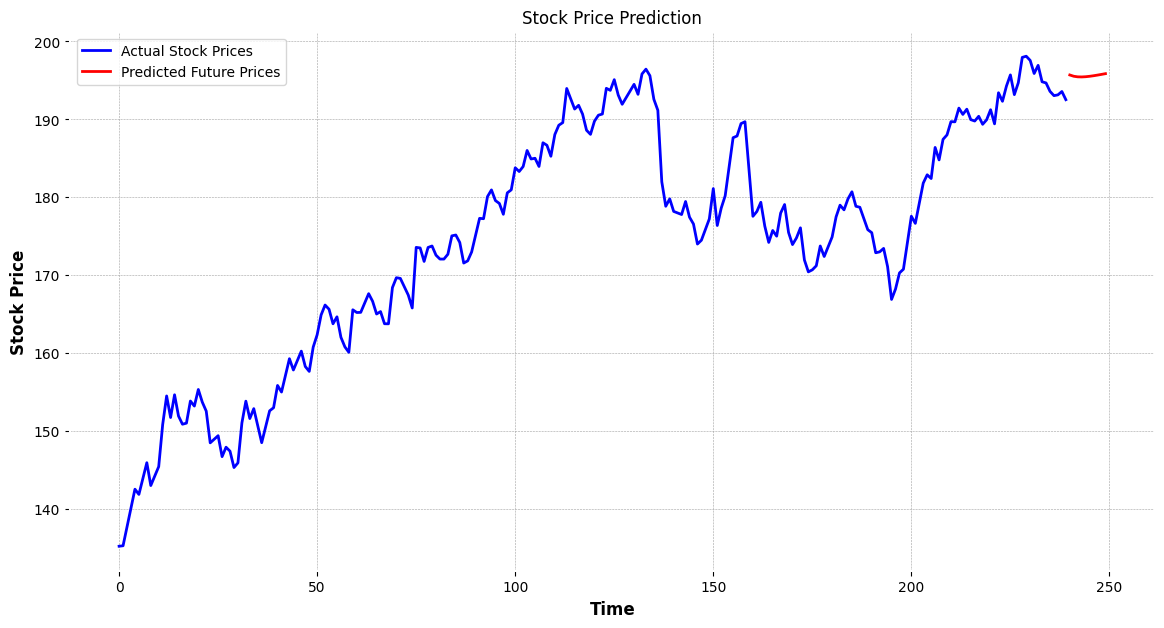

In [24]:
# Predict Future Stock Prices
def predict_future(model, recent_data, future_steps):
    future_predictions = []
    input_sequence = recent_data

    for _ in range(future_steps):
        # Reshape the input to match the LSTM input shape (1 sample, time steps, features)
        input_sequence_reshaped = np.reshape(input_sequence, (1, input_sequence.shape[0], input_sequence.shape[1]))
        
        # Predict the next time step
        next_price = model.predict(input_sequence_reshaped)
        
        # Append the prediction to the future predictions list
        future_predictions.append(next_price[0, 0])

        # Update the input sequence by removing the first element and adding the predicted value
        next_input = np.append(input_sequence[1:], [[next_price[0, 0]]], axis=0)
        input_sequence = next_input

    return future_predictions

# Get the most recent data from the test set
recent_data = X_test[-1]  # The last sequence of data

# Number of future steps to predict (e.g., predict for the next 10 days)
future_steps = 10

# Predict future stock prices using the best model
future_stock_prices = predict_future(best_model, recent_data, future_steps)

# Inverse transform the future predictions to get the original scale of prices
future_stock_prices = scaler.inverse_transform(np.array(future_stock_prices).reshape(-1, 1))

# Plot the results
actual_prices = scaler.inverse_transform(y_test.reshape(-1, 1))  # Actual stock prices
all_predictions = np.concatenate([actual_prices, future_stock_prices], axis=0)  # Concatenate actual and future

# Plot actual prices and future predictions
plt.figure(figsize=(14,7))
plt.plot(np.arange(len(actual_prices)), actual_prices, label='Actual Stock Prices', color='blue')
plt.plot(np.arange(len(actual_prices), len(all_predictions)), future_stock_prices, label='Predicted Future Prices', color='red')
plt.title("Stock Price Prediction")
plt.xlabel("Time")
plt.ylabel("Stock Price")
plt.legend()
plt.show()

1/1 [==============================] - 0s 35ms/step
     Date     Predicted Stock Price
0 2023-12-30       195.701645      
1 2023-12-31       195.537643      


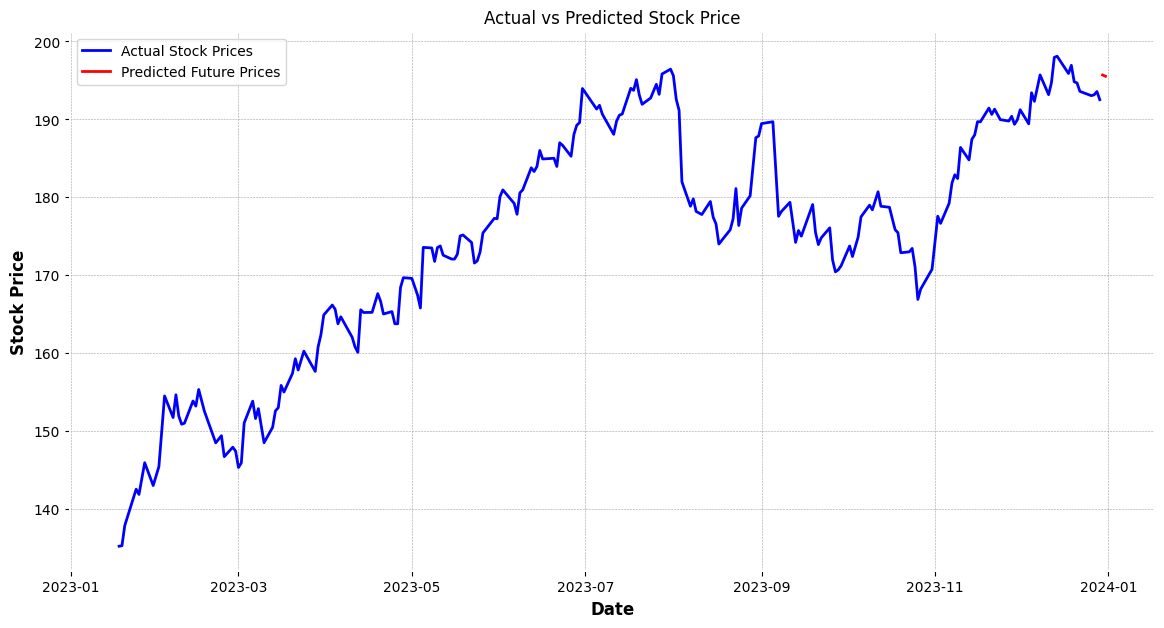

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from datetime import timedelta



# Function to predict future stock prices
def predict_future(model, recent_data, future_steps):
    future_predictions = []
    input_sequence = recent_data

    for _ in range(future_steps):
        # Reshape the input to match the LSTM input shape (1 sample, time steps, features)
        input_sequence_reshaped = np.reshape(input_sequence, (1, input_sequence.shape[0], input_sequence.shape[1]))
        
        # Predict the next time step
        next_price = model.predict(input_sequence_reshaped)
        
        # Append the prediction to the future predictions list
        future_predictions.append(next_price[0, 0])

        # Update the input sequence by removing the first element and adding the predicted value
        next_input = np.append(input_sequence[1:], [[next_price[0, 0]]], axis=0)
        input_sequence = next_input

    return future_predictions

# Get the most recent data from the test set
recent_data = X_test[-1]  # The last sequence of test data

# Number of future steps to predict (e.g., predict for the next 10 days)
future_steps = 2

# Predict future stock prices using the best model
future_stock_prices = predict_future(best_model, recent_data, future_steps)

# Inverse transform the future predictions to get the original scale of prices
future_stock_prices = scaler.inverse_transform(np.array(future_stock_prices).reshape(-1, 1))

# Create future dates starting from the last date in our dataset

last_date = pd.to_datetime(df['Date'].iloc[-1])
future_dates = [last_date + timedelta(days=i) for i in range(1, future_steps + 1)]

# Combine future dates with the predicted stock prices
predicted_data = pd.DataFrame({
    'Date': future_dates,
    'Predicted Stock Price': future_stock_prices.flatten()
})

# Display the predicted stock prices along with their future dates
print(predicted_data)



# Get only the corresponding dates for the test set
test_dates = pd.to_datetime(df['Date'][-len(y_test):])

# Plot the actual test prices and future predictions
plt.figure(figsize=(14,7))
plt.plot(test_dates, scaler.inverse_transform(y_test.reshape(-1, 1)), label='Actual Stock Prices', color='blue')
plt.plot(future_dates, future_stock_prices, label='Predicted Future Prices', color='red')
plt.title("Actual vs Predicted Stock Price")
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.legend()
plt.show()
